In [1]:
from netCDF4 import Dataset
import rasterio
import os
from datetime import datetime
import numpy as np
from os.path import join


In [2]:
# local libraries
from coupling_PCR_FM.model_functions_v2 import PCR_model, CMF_model, DFM_model
from coupling_PCR_FM.utils import config_to_dict, determineSteps
%config Application.log_level="INFO"

In [3]:
# IMPORT MODEL SETTINGS FROM INI-FILE
argv1 = r'default_rename.set'
argv2 = r'paths.env'

# parse set/ini-file with central/general settings for coupling framework
config = config_to_dict(argv1)
# parse env-file for user-specific paths and environmental variables
envs = config_to_dict(argv2)
# combine
config.update(envs)
options = config
# parse dates
start_date = datetime.strptime(options['numerical_settings']['startTime'], '%Y-%m-%d')
end_date = datetime.strptime(options['numerical_settings']['endTime'], '%Y-%m-%d')
print start_date
print end_date
timeSteps = determineSteps(start_date, end_date)
print timeSteps

2000-01-01 00:00:00
2001-12-31 00:00:00
730


In [4]:
# setup output dir
cwd = os.getcwd() # note: this get changed by pcr initialization later on
out_dir = options['PCRpaths']['outputDirectoryPCR']
out_dir = out_dir + 'CMF_alone/'
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
print(out_dir)
print(cwd)

/home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/
/home/ikeuchi/Share/GLOFRIM/glofrim


## create PCR model BMI object

In [5]:
PCR_configfile = os.path.join(cwd, options['hydrologic_model']['config_dir'], options['hydrologic_model']['config_file'])
PCR_in_dir = options['PCRpaths']['inputDirectoryPCR']
PCR_out_dir = os.path.join(out_dir, 'PCR')

PCR_bmi = PCR_model(PCR_configfile, PCR_in_dir, PCR_out_dir,
                            start_date, end_date)


## create CMF model BMi object

In [6]:
CMF_engine = os.path.join(cwd, options['CMF_engine']['CMF_path'])
CMF_model_dir = os.path.join(cwd, options['routing_model']['model_dir'])
CMF_config_fn = os.path.join(CMF_model_dir, options['routing_model']['model_file'])
CMF_out_dir = os.path.join(out_dir, 'CMF')
     
CMF_bmi = CMF_model(CMF_engine, CMF_config_fn, CMF_model_dir, CMF_out_dir,
                         start_date, end_date)

2018-03-16 15:08:50,856 - INFO - Loading library from path /home/ikeuchi/Share/GLOFRIM/glofrim/cama-flood_bmi/src/libcama.so


In [7]:
# couple
#PCR_bmi.couple_grid_to_grid(CMF_bmi)

## initialize models

In [8]:
# initialize model at CMF_out_dir after inpmat has been set in the grid_to_grid coupling function.
CMF_bmi.initialize()
# initialize model 
PCR_bmi.initialize()

2018-03-16 15:08:51,102 - INFO - Ini file for CMF written to /home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/CMF/input_flood.nam
2018-03-16 15:08:51,105 - INFO - Loading model /home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/CMF/input_flood.nam in directory /home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/CMF
2018-03-16 15:08:51,128 - INFO - CMF initialized
2018-03-16 15:08:51,160 - INFO - Ini file for PCR written to /home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/PCR/setup_PCR_30min_Elbe.ini
2018-03-16 15:08:51,446 - INFO - Model run started at 2018-03-16 15:08:51.166124
2018-03-16 15:08:51,446 pcrglobwb_bmi_v203.configuration INFO Model run started at 2018-03-16 15:08:51.166124
2018-03-16 15:08:51,454 - INFO - Logging output to /home/ikeuchi/Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/PCR/log/setup_PCR_30min_Elbe.ini_2018-03-16T15:08:51.166124.log
2018-03-16 15:08:51,454 pcrglobwb_bmi_v203.configuratio

## run coupled PCR - CMF model

2018-03-16 15:08:59,971 - INFO - reading forcings for time 2000-01-01
2018-03-16 15:08:59,971 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-01-01
2018-03-16 15:09:00,167 - INFO - updating model to time 2000-01-01
2018-03-16 15:09:00,167 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-01-01
2018-03-16 15:09:01,789 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-01-01, timestep 1
2018-03-16 15:09:01,789 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-01-01, timestep 1
2018-03-16 15:09:01,804 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-02 00:00:00, timestep 86400.0
2018-03-16 15:09:01,804 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-02 00:00:00, timestep 86400.0
2018-03-16 15:09:01,812 - INFO - reading forcings for time 2000-01-02
2018-03-16 15:09:01,812 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-01-02
2

2018-03-16 15:09:11,661 - INFO - reading forcings for time 2000-01-11
2018-03-16 15:09:11,661 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-01-11
2018-03-16 15:09:11,842 - INFO - updating model to time 2000-01-11
2018-03-16 15:09:11,842 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-01-11
2018-03-16 15:09:12,662 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-01-11, timestep 11
2018-03-16 15:09:12,662 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-01-11, timestep 11
2018-03-16 15:09:12,694 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-12 00:00:00, timestep 86400.0
2018-03-16 15:09:12,694 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-12 00:00:00, timestep 86400.0
2018-03-16 15:09:12,701 - INFO - reading forcings for time 2000-01-12
2018-03-16 15:09:12,701 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-01-12

2018-03-16 15:09:22,345 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-21 00:00:00, timestep 86400.0
2018-03-16 15:09:22,352 - INFO - reading forcings for time 2000-01-21
2018-03-16 15:09:22,352 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-01-21
2018-03-16 15:09:22,535 - INFO - updating model to time 2000-01-21
2018-03-16 15:09:22,535 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-01-21
2018-03-16 15:09:23,408 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-01-21, timestep 21
2018-03-16 15:09:23,408 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-01-21, timestep 21
2018-03-16 15:09:23,445 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-22 00:00:00, timestep 86400.0
2018-03-16 15:09:23,445 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-22 00:00:00, timestep 86400.0
2018-03-1

2018-03-16 15:09:33,166 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-31 00:00:00, timestep 86400.0
2018-03-16 15:09:33,166 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-01-31 00:00:00, timestep 86400.0
2018-03-16 15:09:33,175 - INFO - reading forcings for time 2000-01-31
2018-03-16 15:09:33,175 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-01-31
2018-03-16 15:09:33,360 - INFO - updating model to time 2000-01-31
2018-03-16 15:09:33,360 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-01-31
2018-03-16 15:09:34,186 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-01-31, timestep 31
2018-03-16 15:09:34,186 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-01-31, timestep 31
2018-03-16 15:09:34,217 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-02-01 00:00:00, timestep 86400.0
2018-03-16 15:09:34,217 coupling_PCR_FM.

2018-03-16 15:09:43,905 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-02-09, timestep 40
2018-03-16 15:09:43,936 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-02-10 00:00:00, timestep 86400.0
2018-03-16 15:09:43,936 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-02-10 00:00:00, timestep 86400.0
2018-03-16 15:09:43,943 - INFO - reading forcings for time 2000-02-10
2018-03-16 15:09:43,943 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-02-10
2018-03-16 15:09:44,124 - INFO - updating model to time 2000-02-10
2018-03-16 15:09:44,124 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-02-10
2018-03-16 15:09:44,959 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-02-10, timestep 41
2018-03-16 15:09:44,959 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-02-10, timestep 41
2018-03-16 15:09:44,989 - INFO -

2018-03-16 15:09:54,495 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-02-19, timestep 50
2018-03-16 15:09:54,495 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-02-19, timestep 50
2018-03-16 15:09:54,524 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-02-20 00:00:00, timestep 86400.0
2018-03-16 15:09:54,524 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-02-20 00:00:00, timestep 86400.0
2018-03-16 15:09:54,531 - INFO - reading forcings for time 2000-02-20
2018-03-16 15:09:54,531 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-02-20
2018-03-16 15:09:54,726 - INFO - updating model to time 2000-02-20
2018-03-16 15:09:54,726 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-02-20
2018-03-16 15:09:55,598 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-02-20, timestep 51
2018-03-16 15:09:55,598 coupling_PCR_FM.model_functions_v2 INFO

2018-03-16 15:10:04,754 - INFO - updating model to time 2000-02-29
2018-03-16 15:10:04,754 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-02-29
2018-03-16 15:10:05,596 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-02-29, timestep 60
2018-03-16 15:10:05,596 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-02-29, timestep 60
2018-03-16 15:10:05,628 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-01 00:00:00, timestep 86400.0
2018-03-16 15:10:05,628 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-01 00:00:00, timestep 86400.0
2018-03-16 15:10:05,635 - INFO - reading forcings for time 2000-03-01
2018-03-16 15:10:05,635 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-03-01
2018-03-16 15:10:05,817 - INFO - updating model to time 2000-03-01
2018-03-16 15:10:05,817 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-03-01
2018-

2018-03-16 15:10:15,356 - INFO - reading forcings for time 2000-03-10
2018-03-16 15:10:15,356 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-03-10
2018-03-16 15:10:15,533 - INFO - updating model to time 2000-03-10
2018-03-16 15:10:15,533 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-03-10
2018-03-16 15:10:16,357 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-03-10, timestep 70
2018-03-16 15:10:16,357 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-03-10, timestep 70
2018-03-16 15:10:16,389 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-11 00:00:00, timestep 86400.0
2018-03-16 15:10:16,389 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-11 00:00:00, timestep 86400.0
2018-03-16 15:10:16,397 - INFO - reading forcings for time 2000-03-11
2018-03-16 15:10:16,397 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-03-11

2018-03-16 15:10:25,897 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-20 00:00:00, timestep 86400.0
2018-03-16 15:10:25,905 - INFO - reading forcings for time 2000-03-20
2018-03-16 15:10:25,905 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-03-20
2018-03-16 15:10:26,086 - INFO - updating model to time 2000-03-20
2018-03-16 15:10:26,086 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-03-20
2018-03-16 15:10:26,911 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-03-20, timestep 80
2018-03-16 15:10:26,911 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-03-20, timestep 80
2018-03-16 15:10:26,942 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-21 00:00:00, timestep 86400.0
2018-03-16 15:10:26,942 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-21 00:00:00, timestep 86400.0
2018-03-1

2018-03-16 15:10:36,512 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-30 00:00:00, timestep 86400.0
2018-03-16 15:10:36,512 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-30 00:00:00, timestep 86400.0
2018-03-16 15:10:36,520 - INFO - reading forcings for time 2000-03-30
2018-03-16 15:10:36,520 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-03-30
2018-03-16 15:10:36,713 - INFO - updating model to time 2000-03-30
2018-03-16 15:10:36,713 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-03-30
2018-03-16 15:10:37,600 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-03-30, timestep 90
2018-03-16 15:10:37,600 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-03-30, timestep 90
2018-03-16 15:10:37,638 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-03-31 00:00:00, timestep 86400.0
2018-03-16 15:10:37,638 coupling_PCR_FM.

2018-03-16 15:10:47,916 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-04-08, timestep 99
2018-03-16 15:10:47,950 - INFO - CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-04-09 00:00:00, timestep 86400.0
2018-03-16 15:10:47,950 coupling_PCR_FM.model_functions_v2 INFO CMF -> start_time: 2000-01-01 00:00:00, current_time 2000-04-09 00:00:00, timestep 86400.0
2018-03-16 15:10:47,957 - INFO - reading forcings for time 2000-04-09
2018-03-16 15:10:47,957 pcrglobwb_bmi_v203.pcrglobwb INFO reading forcings for time 2000-04-09
2018-03-16 15:10:48,153 - INFO - updating model to time 2000-04-09
2018-03-16 15:10:48,153 pcrglobwb_bmi_v203.pcrglobwb INFO updating model to time 2000-04-09
2018-03-16 15:10:49,020 - INFO - PCR -> start_time: 2000-01-01, current_time 2000-04-09, timestep 100
2018-03-16 15:10:49,020 coupling_PCR_FM.model_functions_v2 INFO PCR -> start_time: 2000-01-01, current_time 2000-04-09, timestep 100
2018-03-16 15:10:49,056 - INFO

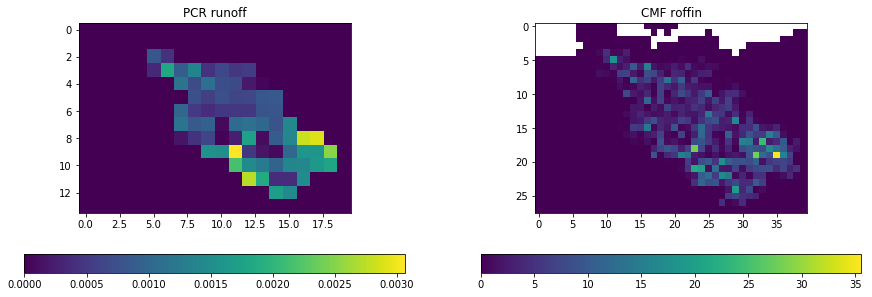

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# run coupled model for 20 timesteps
def update_states(idate):
    "coupling runoff between CMF and PCR model"
    runoff = np.copy(PCR_bmi.get_var('runoff'))
    runoff = np.where(np.isnan(runoff), 0, runoff)

#    "reading from external PCR runoff output"
#    date_str = idate.strftime('%Y%m%d')
#    runoff = np.copy(np.fromfile(join(cwd, 'sample_runoff/PCR/Roff____{}.one'.format(date_str)), 'f').reshape(14, 20))
 #   runoff = np.where(runoff > 1.e19, 0, runoff)
    CMF_bmi.set_var("roffin", runoff)
    return runoff

import datetime
#for i in range(timeSteps):
for i in range(100):
    idate = start_date + datetime.timedelta(i)
    PCR_bmi.update()
    runoff = update_states(idate)
    CMF_bmi.update()   
    
fig = plt.figure(figsize=(15, 5))
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(runoff)
a.set_title('PCR runoff')
plt.colorbar(orientation ='horizontal')
a=fig.add_subplot(1,2,2)
roffin = np.copy(CMF_bmi.get_var('runoff'))
imgplot = plt.imshow(roffin)
a.set_title('CMF roffin')
plt.colorbar(orientation='horizontal')


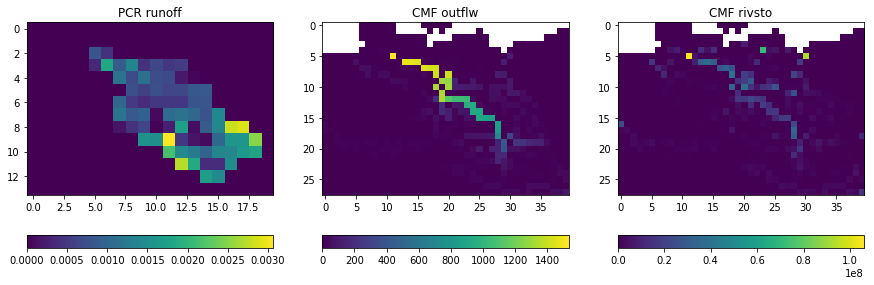

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# PCR_bmi.update()
# routingModel.update_states()
# routingModel.update() 

#runoff = PCR_bmi.get_var('landSurfaceRunoff')
outflw = CMF_bmi.get_var('outflw')
outflw = np.ma.masked_greater(outflw, 1.e19)
rivsto = CMF_bmi.get_var('rivsto_out')
rivsto = np.ma.masked_greater(rivsto, 1.e19)

fig = plt.figure(figsize=(15, 5))
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(runoff)
a.set_title('PCR runoff')
plt.colorbar(orientation ='horizontal')
a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(outflw)
a.set_title('CMF outflw')
plt.colorbar(orientation='horizontal')
a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(rivsto)
a.set_title('CMF rivsto')
plt.colorbar(orientation='horizontal')

In [11]:
# finalize model
PCR_bmi.finalize()

# finalize model
CMF_bmi.finalize()

2018-03-16 15:10:50,051 - INFO - cd /home/ikeuchi/Share/GLOFRIM/glofrim
2018-03-16 15:10:50,051 bmi.wrapper INFO cd /home/ikeuchi/Share/GLOFRIM/glofrim


In [14]:
import netCDF4

nc = netCDF4.Dataset('/home/ikeuchi//Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/PCR/netcdf/runoff_dailyTot_output.nc', 'r')
runoff_output = nc.variables['land_surface_runoff'][-1]
#nc = netCDF4.Dataset('/home/ikeuchi//Share/GLOFRIM/work/GLOFRIM-CAMA/output30minCMF_alone/PCR/netcdf/discharge_dailyTot_output.nc', 'r')
#runoff_output = nc.variables['discharge'][-1]
time = nc.variables['time'][-1]
import datetime
date_now =  datetime.datetime(1901,1,1) + datetime.timedelta(int(time))
date_now

datetime.datetime(2000, 4, 9, 0, 0)

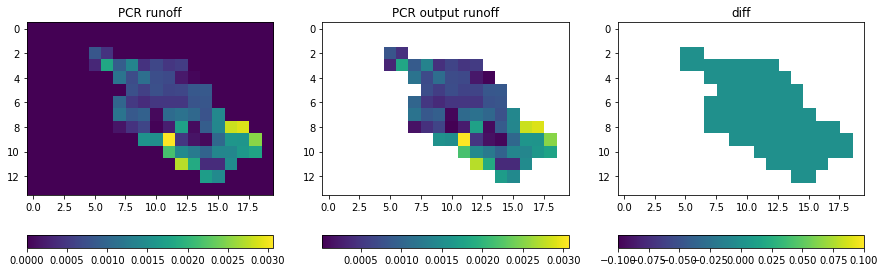

In [15]:
fig = plt.figure(figsize=(15, 5))
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(runoff)
a.set_title('PCR runoff')
plt.colorbar(orientation ='horizontal')
a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(runoff_output)
a.set_title('PCR output runoff')
plt.colorbar(orientation ='horizontal')
a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(runoff - runoff_output)
a.set_title('diff')
plt.colorbar(orientation ='horizontal')